### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [1]:
### Data Collection
import pandas_datareader as pdr
import os
key = ""
#use key from tiingo here
#https://api.tiingo.com

In [2]:
df = pdr.get_data_tiingo('MSFT', api_key =key )

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [3]:
df.to_csv('/MSFT.csv')

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('/MSFT.csv')

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,MSFT,2017-11-10 00:00:00+00:00,83.87,84.095,83.23,83.79,19340435,78.787344,78.998709,78.186129,78.712192,19340435,0.00,1.0
1,MSFT,2017-11-13 00:00:00+00:00,83.93,83.940,83.46,83.66,14080820,78.843708,78.853102,78.402191,78.590070,14080820,0.00,1.0
2,MSFT,2017-11-14 00:00:00+00:00,84.05,84.100,82.98,83.50,18604034,78.956436,79.003406,77.951280,78.439767,18604034,0.00,1.0
3,MSFT,2017-11-15 00:00:00+00:00,82.98,83.690,82.69,83.47,19097333,78.345827,79.016176,78.072022,78.808462,19097333,0.42,1.0
4,MSFT,2017-11-16 00:00:00+00:00,83.20,83.420,82.94,83.10,20659209,78.553541,78.761254,78.308061,78.459125,20659209,0.00,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,MSFT,2022-11-02 00:00:00+00:00,220.10,231.30,220.040,229.46,38407008,220.10,231.30,220.040,229.46,38407008,0.0,1.0
1253,MSFT,2022-11-03 00:00:00+00:00,214.25,220.41,213.980,220.09,36633922,214.25,220.41,213.980,220.09,36633922,0.0,1.0
1254,MSFT,2022-11-04 00:00:00+00:00,221.39,221.59,213.431,217.55,36789063,221.39,221.59,213.431,217.55,36789063,0.0,1.0
1255,MSFT,2022-11-07 00:00:00+00:00,227.87,228.41,221.280,221.99,33497979,227.87,228.41,221.280,221.99,33497979,0.0,1.0
1256,MSFT,2022-11-08 00:00:00+00:00,228.87,231.65,225.840,228.70,28192548,228.87,231.65,225.840,228.70,28192548,0.0,1.0


In [8]:
df1=df.reset_index()['close']

In [9]:
df1

0        83.87
1        83.93
2        84.05
3        82.98
4        83.20
         ...  
1252    220.10
1253    214.25
1254    221.39
1255    227.87
1256    228.87
Name: close, Length: 1257, dtype: float64

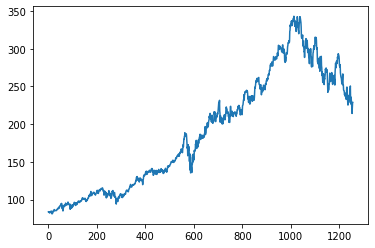

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [12]:
import numpy as np

In [15]:
df1
t=df1

In [18]:
t

83.87

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [20]:
print(df1)

[[0.01064764]
 [0.01087662]
 [0.01133458]
 ...
 [0.53547304]
 [0.56020303]
 [0.56401939]]


In [21]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [22]:
training_size,test_size

(817, 440)

In [23]:
train_data

array([[0.01064764],
       [0.01087662],
       [0.01133458],
       [0.00725108],
       [0.00809068],
       [0.00503759],
       [0.00553372],
       [0.01007518],
       [0.0077472 ],
       [0.00831966],
       [0.01064764],
       [0.01450216],
       [0.00862497],
       [0.01179254],
       [0.01213601],
       [0.        ],
       [0.00194634],
       [0.00648781],
       [0.00538106],
       [0.01175438],
       [0.01583788],
       [0.01717361],
       [0.01629584],
       [0.01377705],
       [0.02202038],
       [0.02022669],
       [0.0181277 ],
       [0.01694462],
       [0.0168683 ],
       [0.01690646],
       [0.01648666],
       [0.01766973],
       [0.0177079 ],
       [0.01702095],
       [0.01858566],
       [0.0201122 ],
       [0.02301263],
       [0.0271343 ],
       [0.02747777],
       [0.02724879],
       [0.02572225],
       [0.0267145 ],
       [0.03251536],
       [0.02774491],
       [0.03457619],
       [0.03442354],
       [0.0340419 ],
       [0.040

In [24]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [25]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [26]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [27]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [28]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [29]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [30]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 10s 351ms/step - loss: 0.0217 - val_loss: 0.1096
Epoch 2/100
12/12 [==============================] - 3s 211ms/step - loss: 0.0064 - val_loss: 0.0043
Epoch 3/100
12/12 [==============================] - 3s 212ms/step - loss: 0.0022 - val_loss: 0.0067
Epoch 4/100
12/12 [==============================] - 2s 209ms/step - loss: 9.8792e-04 - val_loss: 0.0055
Epoch 5/100
12/12 [==============================] - 2s 206ms/step - loss: 8.3948e-04 - val_loss: 0.0041
Epoch 6/100
12/12 [==============================] - 2s 204ms/step - loss: 6.9381e-04 - val_loss: 0.0037
Epoch 7/100
12/12 [==============================] - 3s 212ms/step - loss: 6.8208e-04 - val_loss: 0.0049
Epoch 8/100
12/12 [==============================] - 3s 218ms/step - loss: 6.7406e-04 - val_loss: 0.0040
Epoch 9/100
12/12 [==============================] - 4s 293ms/step - loss: 6.7151e-04 - val_loss: 0.0034
Epoch 10/100
12/12 [==============================] - 2s 210ms/ste

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
print(train_predict)

In [ ]:
print(y_train)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)

test_predict=scaler.inverse_transform(test_predict)

In [ ]:
print(train_predict.shape)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

def rmse(y, y_hat):
    return np.sqrt(np.mean(np.square(y - y_hat)))

def mape(y, y_hat):
    return np.mean(np.abs((y - y_hat)/y)*100)

print(rmse(y_train,train_predict))
print(mape(y_train,train_predict))

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

275.81939549795436

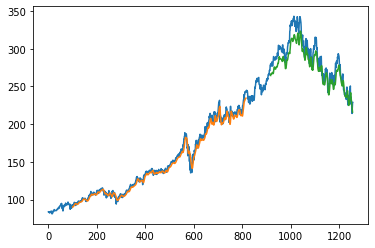

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

440

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 99)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.6589321833377857,
 0.65660420562531,
 0.6784719306949586,
 0.7122085257413272,
 0.7014845628363163,
 0.6693890012593978,
 0.6838148303629354,
 0.6707247261763919,
 0.6812197076670609,
 0.6936991947486929,
 0.7065221539518375,
 0.7148799755753156,
 0.7120558714650994,
 0.7000343472121512,
 0.6586650383543868,
 0.6550394992939739,
 0.6602297446857229,
 0.6703049269167652,
 0.6608785253596916,
 0.681028889821776,
 0.6914857077433879,
 0.7012937449910314,
 0.6841964660535053,
 0.6783574399877875,
 0.6519100866313017,
 0.7161775369232529,
 0.7454489943899553,
 0.7619738197916269,
 0.7515551654390716,
 0.7393809869098956,
 0.7685761172384841,
 0.7730794183872075,
 0.7702553142769911,
 0.7603709498912338,
 0.7679273365645155,
 0.7941075449376026,
 0.785940541159409,
 0.8046025264282716,
 0.8105560432011601,
 0.8076556119528296,
 0.8023508758539099,
 0.7979620654123573,
 0.7826203106514519,
 0.7505629126435903,
 0.7455634850971261,
 0.7430828531084227,
 0.754760905239858,
 0.713696904934549

In [ ]:
 # demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps= 100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.65660421 0.67847193 0.71220853 0.70148456 0.669389   0.68381483
 0.67072473 0.68121971 0.69369919 0.70652215 0.71487998 0.71205587
 0.70003435 0.65866504 0.6550395  0.66022974 0.67030493 0.66087853
 0.68102889 0.69148571 0.70129374 0.68419647 0.67835744 0.65191009
 0.71617754 0.74544899 0.76197382 0.75155517 0.73938099 0.76857612
 0.77307942 0.77025531 0.76037095 0.76792734 0.79410754 0.78594054
 0.80460253 0.81055604 0.80765561 0.80235088 0.79796207 0.78262031
 0.75056291 0.74556349 0.74308285 0.75476091 0.7136969  0.70278212
 0.69415716 0.68843262 0.68434912 0.66778613 0.65706217 0.67553334
 0.67717437 0.69984353 0.70820135 0.65225356 0.65313132 0.62702744
 0.62458497 0.62374537 0.61584551 0.60248826 0.61023547 0.59855742
 0.59676373 0.59279472 0.61057894 0.59695455 0.57939931 0.60931954
 0.64038469 0.64160592 0.6324085  0.58451322 0.5654696  0.55081479
 0.55211235 0.58451322 0.56283632 0.59706904 0.6007709  0.59306186
 0.59180247 0.61458612 0.63416403 0.6471778  0.573

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
def rmse(y, y_hat):
    return np.sqrt(np.mean(np.square(y - y_hat)))

def mape(y, y_hat):
    return np.mean(np.abs((y - y_hat)/y)*100)

print(rmse(y_val, val_predictions))
print(mape(y_val, val_predictions))

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

In [ ]:
plt.plot(df3)